In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array( X[:, 0]**2 + X[:, 1] < 1.5, dtype = 'int') #基本为抛物线形
for _ in range(20):
    y[np.random.randint(200)] = 1 #有一定的噪音
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 666)

In [3]:
#使用sklearn中的逻辑回归
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) #里面的 penalty='l2'代表默认使用L2正则项, C=1.0超参数C为1

f:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
log_reg.score(X_train,y_train)

0.7933333333333333

In [5]:
log_reg.score(X_test, y_test)

0.86

In [6]:
#绘制决策边界
def plot_decision_boundary(model, axis):#axis中有4个元素（其实就是X轴Y轴的范围）
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


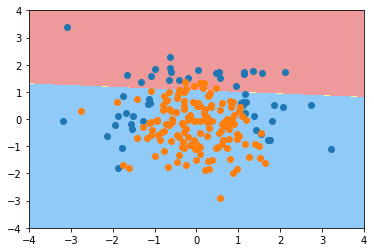

In [7]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

In [8]:
#多项式逻辑回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PoplynomialLogisticRegression(degree):#使用管道
    return Pipeline({
        ('poly', PolynomialFeatures(degree = degree)),#添加多项式
        ('std_scaler', StandardScaler()),#标准化
        ('log_reg', LogisticRegression())#逻辑回归
    })

In [9]:
poly_log_reg = PoplynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

f:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [10]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [11]:
poly_log_reg.score(X_test, y_test)

0.94

f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


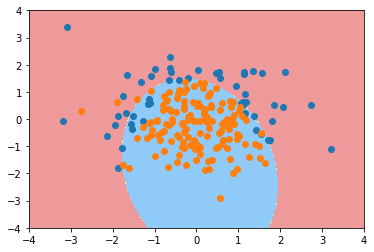

In [12]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

f:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8733333333333333
0.94


f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


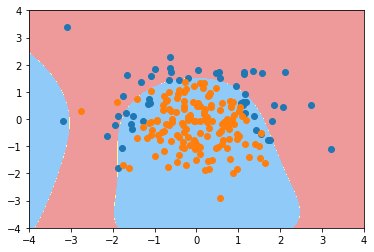

In [13]:
#当degree=2, C=0.1时
def PolynomialLogisticRegression2(degree, C):#使用管道
    return Pipeline({
        ('poly', PolynomialFeatures(degree = degree)),#添加多项式
        ('std_scaler', StandardScaler()),#标准化
        ('log_reg', LogisticRegression(C = C))#逻辑回归
    })
poly_log_reg2 = PolynomialLogisticRegression2(degree=10, C=0.1)
poly_log_reg2.fit(X_train, y_train)
print(poly_log_reg2.score(X_train, y_train))
print(poly_log_reg2.score(X_test, y_test))
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show() #当degree增大时，虽然加入了C但还是明显过拟合

f:\python\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8266666666666667
0.9


f:\python\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  app.launch_new_instance()


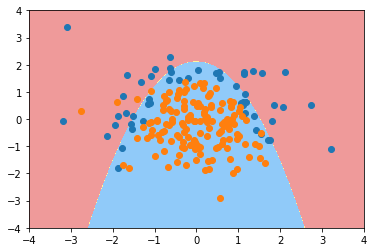

In [14]:
#当degree=2, C=0.1,时
def PolynomialLogisticRegression3(degree, C, penalty='l2'):#使用管道
    return Pipeline({
        ('poly', PolynomialFeatures(degree = degree)),#添加多项式
        ('std_scaler', StandardScaler()),#标准化
        ('log_reg', LogisticRegression(C = C, penalty = penalty))#逻辑回归
    })
poly_log_reg3 = PolynomialLogisticRegression3(degree=10, C=0.1,penalty='l1')
poly_log_reg3.fit(X_train, y_train)
print(poly_log_reg3.score(X_train, y_train))
print(poly_log_reg3.score(X_test, y_test))
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show() #相比上一个degree=10、C=0.1,这边加入了penalty='l1'也就是L1正则项，过拟合现象明显变好很多

具体最适合的C,degree,penalty的大小需要使用网格搜索进行查找，才能确定最佳的超参数